# <span style='color:blue'>종합실습 1</span>
- 미세먼지로 인해 건강, 환경, 경제 등 영향을 주면서 다양한 문제를 일으키고 있다. 그래서 대기 중 오염물질과 기상정보를 활용하여  
  미세먼지 발생/증가에 영향을 미치는 인자를 도출하고, 그 영향도를 분석하고자 한다. 다양한 분석을 통해 미세먼지를 유발하는 영향인자를  
  선정하고, 선정된 영향인자를 활용하여 미세먼지 발생량을 예측하고, 대응방안을 수립하라.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as statsmodels
import graphviz
from sklearn.tree import export_graphviz

import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats
import scipy.stats
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc('axes', unicode_minus=False)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## 데이터 불러오기

In [2]:
df_raw = pd.read_csv('AIR_POLLUTION.csv', encoding = 'euc-kr', parse_dates = ['MeasDate'])

In [3]:
df_raw.describe()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000000,365.000000,365.000000,311.000000,365.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,33.421918,0.023600,0.026814,0.517042,0.003033,13.863798,0.381639,2.225301,209.450820,60.295082,1005.848907,0.022951,5.064016
std,15.937983,0.011896,0.010271,0.152820,0.000632,9.830280,1.122127,0.723171,70.735018,14.534983,8.126823,0.222361,2.986119
min,5.000000,0.002000,0.008000,0.300000,0.002000,-7.950000,0.000000,0.940000,50.000000,17.900000,983.800000,0.000000,0.000000
25%,22.000000,0.014000,0.019000,0.400000,0.003000,5.492500,0.000000,1.722500,160.250000,49.650000,999.400000,0.000000,2.510000
50%,31.000000,0.023000,0.025000,0.500000,0.003000,14.000000,0.000000,2.095000,221.000000,61.050000,1006.450000,0.000000,5.310000
75%,42.000000,0.032000,0.034000,0.600000,0.003000,23.070000,0.115000,2.620000,266.000000,69.950000,1011.575000,0.000000,7.570000
max,101.000000,0.062000,0.059000,1.000000,0.005000,31.720000,11.800000,5.880000,351.000000,95.000000,1025.500000,3.200000,10.000000


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   366 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         311 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       366 non-null    float64       
 7   RAIN       366 non-null    float64       
 8   WIND       366 non-null    float64       
 9   WIND_DIR   366 non-null    int64         
 10  HUMIDITY   366 non-null    float64       
 11  ATM_PRESS  366 non-null    float64       
 12  SNOW       366 non-null    float64       
 13  CLOUD      366 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 40.2 KB


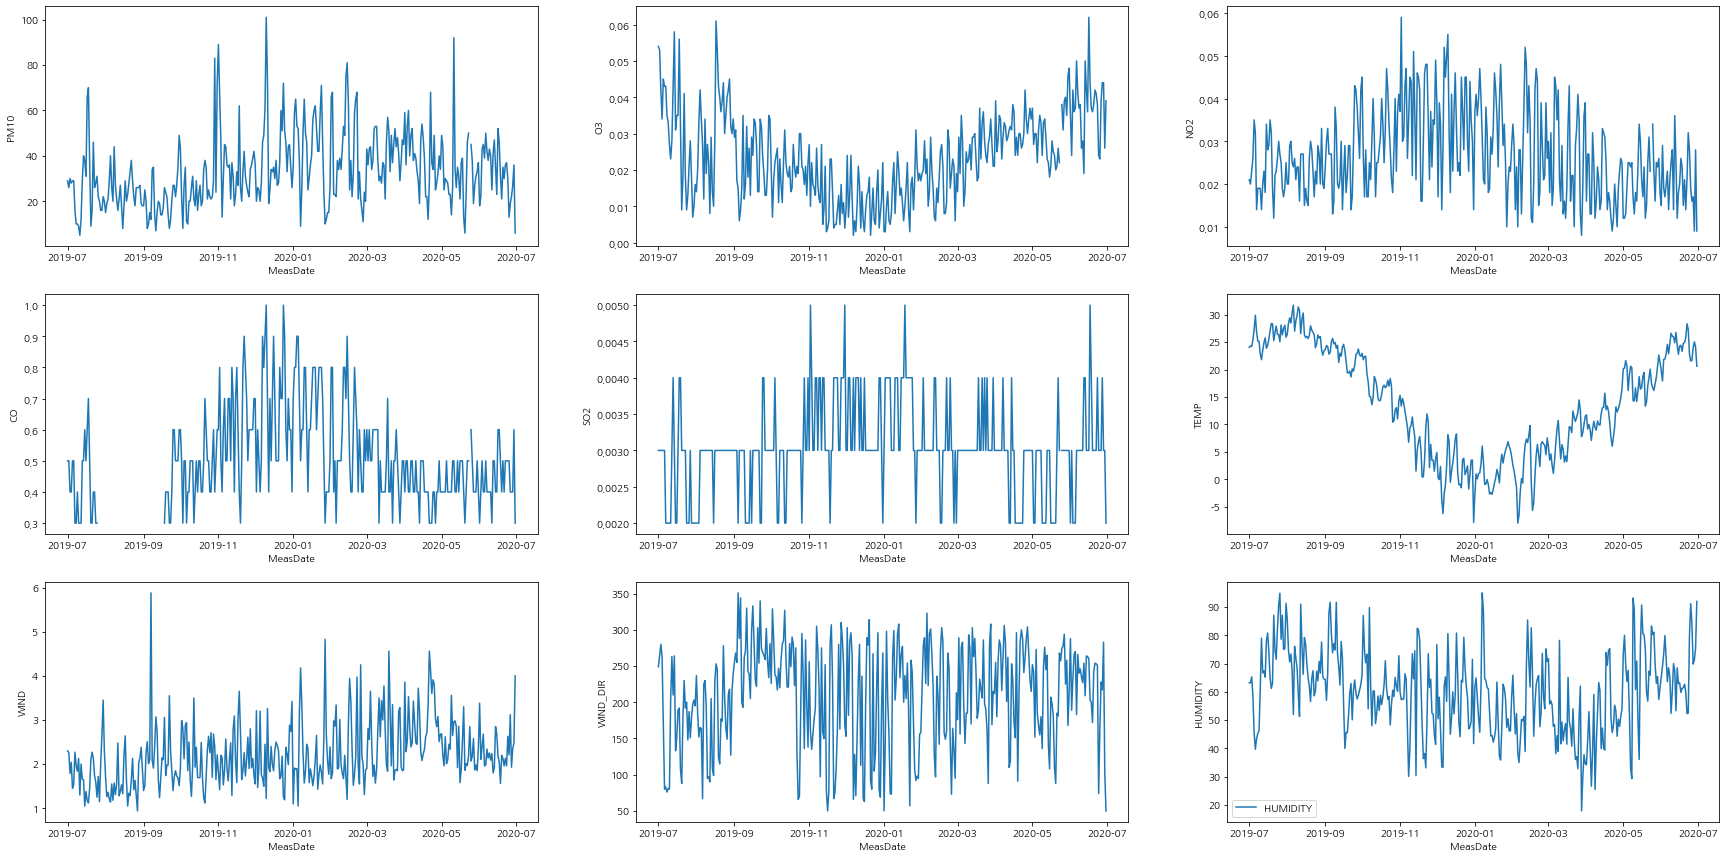

In [5]:
# 일자별 데이터 분포
fig = plt.figure(figsize=(30,15))

# 일자별 PM10 분포
plt.subplot(331)
plt.plot(df_raw["MeasDate"], df_raw["PM10"], label = "PM10")
plt.ylabel("PM10"); plt.xlabel("MeasDate")

# 일자별 O3 분포
plt.subplot(332)
plt.plot(df_raw["MeasDate"], df_raw["O3"], label = "O3")
plt.ylabel("O3"); plt.xlabel("MeasDate")

# 일자별 NO2 분포
plt.subplot(333)
plt.plot(df_raw["MeasDate"], df_raw["NO2"], label = "NO2")
plt.ylabel("NO2"); plt.xlabel("MeasDate")

# 일자별 CO 분포
plt.subplot(334)
plt.plot(df_raw["MeasDate"], df_raw["CO"], label = "CO")
plt.ylabel("CO"); plt.xlabel("MeasDate")

# 일자별 SO2 분포
plt.subplot(335)
plt.plot(df_raw["MeasDate"], df_raw["SO2"], label = "SO2")
plt.ylabel("SO2"); plt.xlabel("MeasDate")

# 일자별 TEMP 분포
plt.subplot(336)
plt.plot(df_raw["MeasDate"], df_raw["TEMP"], label = "TEMP")
plt.ylabel("TEMP"); plt.xlabel("MeasDate")

# 일자별 WIND 분포
plt.subplot(337)
plt.plot(df_raw["MeasDate"], df_raw["WIND"], label = "WIND")
plt.ylabel("WIND"); plt.xlabel("MeasDate")

# 일자별 WIND_DIR 분포
plt.subplot(338)
plt.plot(df_raw["MeasDate"], df_raw["WIND_DIR"], label = "WIND_DIR")
plt.ylabel("WIND_DIR"); plt.xlabel("MeasDate")

# 일자별 HUMIDITY 분포
plt.subplot(339)
plt.plot(df_raw["MeasDate"], df_raw["HUMIDITY"], label = "HUMIDITY")
plt.ylabel("HUMIDITY"); plt.xlabel("MeasDate")

plt.legend(loc = "best")
plt.show()

## 결측치 확인 및 제거

- PM10 -> 목표변수이므로 분할,
- O3 -> (20.05.24)결측치 1개
- NO2 -> (20.05.24)결측치 1개
- CO -> 결측치 55개
- SO2 -> (20.05.24)결측치 1개
- TEMP
- RAIN
- WIND
- WIND_DIR
- HUMIDITY
- ATM_PRESS
- SNOW
- CLOUD
  
  
- 2020.05.25 일자의 O3, NO2, CO, SO2 데이터가 일괄적으로 존재하지 않기에, 해당 일자의 데이터 삭제
- CO는 평균값으로 대체

In [6]:
df_raw.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

In [7]:
df_raw.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92


In [8]:
df_raw.dropna(subset=['PM10'], inplace = True)
df_raw['CO'].fillna(df_raw['CO'].mean(), inplace = True)
df_raw.index = list(range(365))

In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   365 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         365 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       365 non-null    float64       
 7   RAIN       365 non-null    float64       
 8   WIND       365 non-null    float64       
 9   WIND_DIR   365 non-null    int64         
 10  HUMIDITY   365 non-null    float64       
 11  ATM_PRESS  365 non-null    float64       
 12  SNOW       365 non-null    float64       
 13  CLOUD      365 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 42.8 KB


In [9]:
# x, y 데이터 분리
df_raw_x = df_raw.drop("PM10", axis = 1)
df_raw_y = df_raw["PM10"]

In [10]:
# train과 test 데이터를 7:3 비율로 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (219, 13)
train data Y size : (219,)
test data X size : (146, 13)
test data Y size : (146,)


## 이상치 확인

<AxesSubplot:>

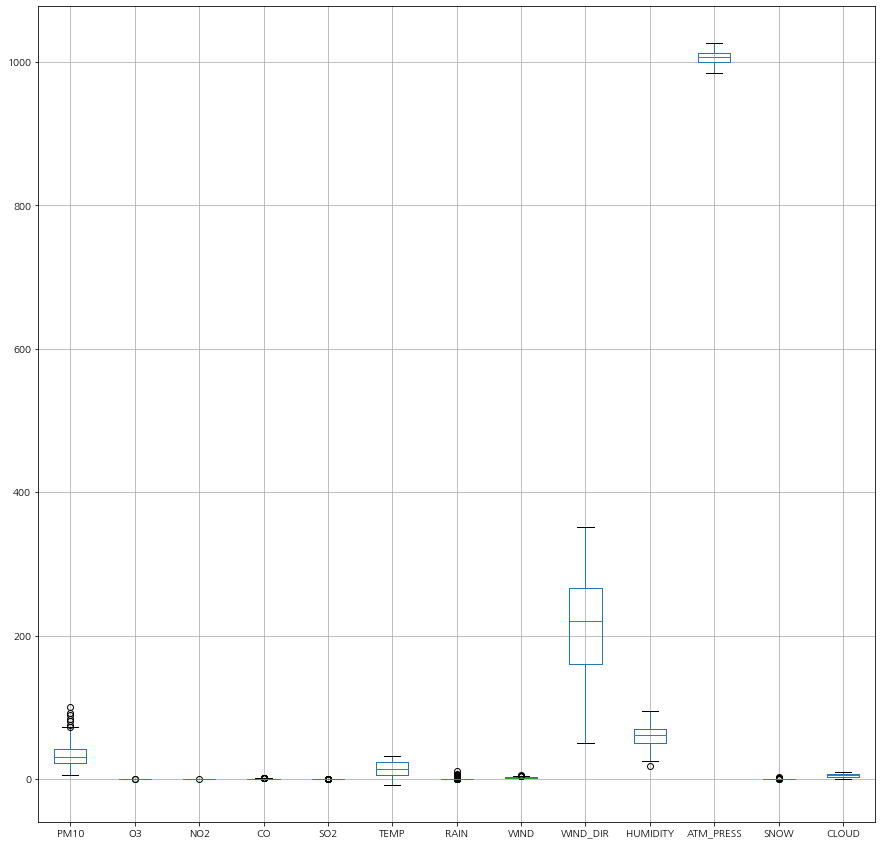

In [11]:
df_raw.boxplot(figsize=(15,15))

### 이상치 확인 결과
- 다양한 변수들에서 이상치로 보이는 요소들이 확인은 되었으나, 이상치라고 판단하기에는 정보가 부족하여 대체하지 않고 넘어가도록 한다.

## 가설 검정

### 가설설정
- 1. 미세먼지 농도는 풍향(편서풍)에 따라 미세먼지 발생량이 증가할 것이다.
- 2. 비가 오는 날에는 미세먼지 발생량은 감소할 것이다.
- 3. 눈이 오는 날에는 미세먼지 발생량은 감소할 것이다.

#### 가설과 부합하지 않은 변수 삭제
- NO2, SO2은 가설과 상관없다고 판단하여 삭제

In [12]:
df_raw.drop(['NO2', 'SO2'], axis=1, inplace=True)

#### 가설에 따른 파생변수 설정
- 1. WIND_DIR을 4개의 방위로 나뉘어 1(서), 2(북), 3(동), 4(남)으로 분리하여 새로운 변수를 생성한다.
- 2. 비가 오는 날에는 O, 오지 않는 날에는 X로 새로운 변수를 생성한다.
- 3. 눈이 오는 날에는 O, 오지 않는 날에는 X로 새로운 변수를 생성한다.

In [13]:
# 1. WIND_DIR을 4개의 방위로 나뉘어 1(서), 2(북), 3(동), 4(남)으로 분리하여 새로운 변수를 생성한다.
newWind = list()

for data in df_raw["WIND_DIR"]:
    if 225 <= data < 315:
        newWind.append("W")
    elif 0 <= data < 45 or 315 <= data <= 360:
        newWind.append("N")
    elif 45 <= data < 135:
        newWind.append("E")
    else:
        newWind.append("S")

df_raw["NEWWIND"] = newWind
df_raw

,MeasDate,PM10,O3,CO,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,NEWWIND
0,2019-07-01,29.0,0.054,0.5,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70,W
1,2019-07-02,26.0,0.053,0.5,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83,W
2,2019-07-03,30.0,0.042,0.4,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29,W
3,2019-07-04,28.0,0.034,0.4,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54,W
4,2019-07-05,29.0,0.045,0.5,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2020-06-26,19.0,0.039,0.4,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73,W
361,2020-06-27,22.0,0.044,0.4,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21,S
362,2020-06-28,27.0,0.044,0.4,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63,W
363,2020-06-29,36.0,0.026,0.6,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58,E


In [14]:
# 2. 비가 오는 날에는 O, 오지 않는 날에는 X로 새로운 변수를 생성한다.
newRain = list()

for data in df_raw["RAIN"]:
    if data != 0:
        newRain.append("O")
    else:
        newRain.append("X")

df_raw["RAIN_"] = newRain
df_raw

,MeasDate,PM10,O3,CO,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,NEWWIND,RAIN_
0,2019-07-01,29.0,0.054,0.5,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70,W,X
1,2019-07-02,26.0,0.053,0.5,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83,W,X
2,2019-07-03,30.0,0.042,0.4,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29,W,X
3,2019-07-04,28.0,0.034,0.4,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54,W,X
4,2019-07-05,29.0,0.045,0.5,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92,S,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2020-06-26,19.0,0.039,0.4,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73,W,O
361,2020-06-27,22.0,0.044,0.4,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21,S,X
362,2020-06-28,27.0,0.044,0.4,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63,W,X
363,2020-06-29,36.0,0.026,0.6,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58,E,O


In [15]:
# 3. 눈이 오는 날에는 O, 오지 않는 날에는 X로 새로운 변수를 생성한다.
newSnow = list()

for data in df_raw["SNOW"]:
    if data != 0:
        newSnow.append("O")
    else:
        newSnow.append("X")

df_raw["SNOW_"] = newSnow
df_raw

,MeasDate,PM10,O3,CO,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,NEWWIND,RAIN_,SNOW_
0,2019-07-01,29.0,0.054,0.5,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70,W,X,X
1,2019-07-02,26.0,0.053,0.5,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83,W,X,X
2,2019-07-03,30.0,0.042,0.4,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29,W,X,X
3,2019-07-04,28.0,0.034,0.4,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54,W,X,X
4,2019-07-05,29.0,0.045,0.5,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92,S,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2020-06-26,19.0,0.039,0.4,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73,W,O,X
361,2020-06-27,22.0,0.044,0.4,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21,S,X,X
362,2020-06-28,27.0,0.044,0.4,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63,W,X,X
363,2020-06-29,36.0,0.026,0.6,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58,E,O,X


#### 그래프 분석

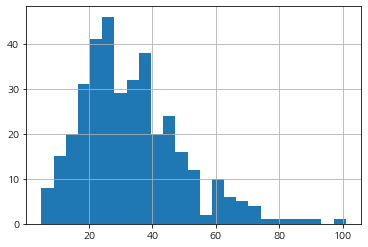

In [16]:
# 목표변수 히스토그램
df_raw_y.hist(bins=25)
plt.show()

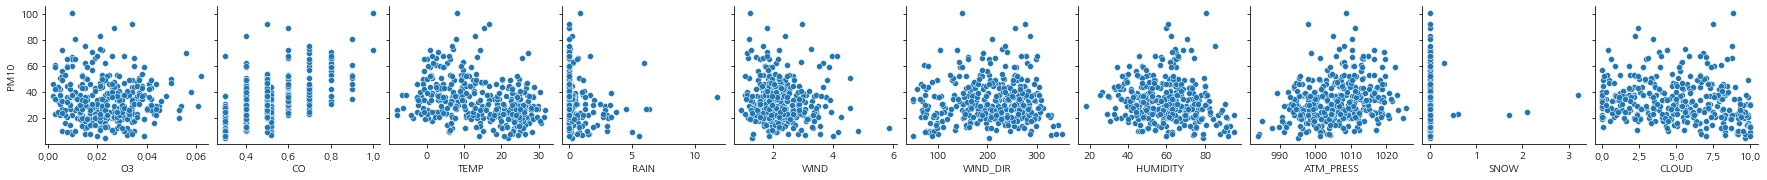

In [17]:
# 회귀선 유무에 따른 산점도 (회귀선 O)
sns.pairplot(y_vars='PM10', x_vars=['O3','CO','TEMP','RAIN','WIND','WIND_DIR','HUMIDITY','ATM_PRESS','SNOW','CLOUD'], data=df_raw)
plt.show()

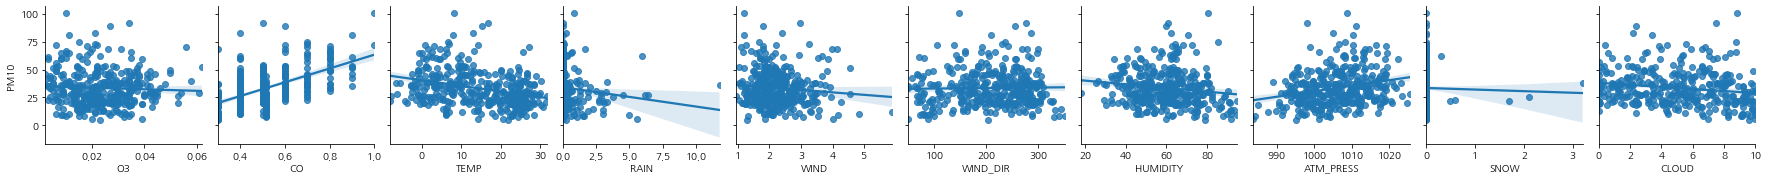

In [18]:
# 회귀선 유무에 따른 산점도 (회귀선 X)
sns.pairplot(y_vars='PM10', x_vars=['O3','CO','TEMP','RAIN','WIND','WIND_DIR','HUMIDITY','ATM_PRESS','SNOW','CLOUD'], kind='reg', data=df_raw)
plt.show()

#### 파생변수 생성에 쓰인 변수 삭제
- 선형성 증가의 문제로 삭제한다.

In [19]:
#df_raw = df_raw.drop(['RAIN','SNOW'],axis=1)

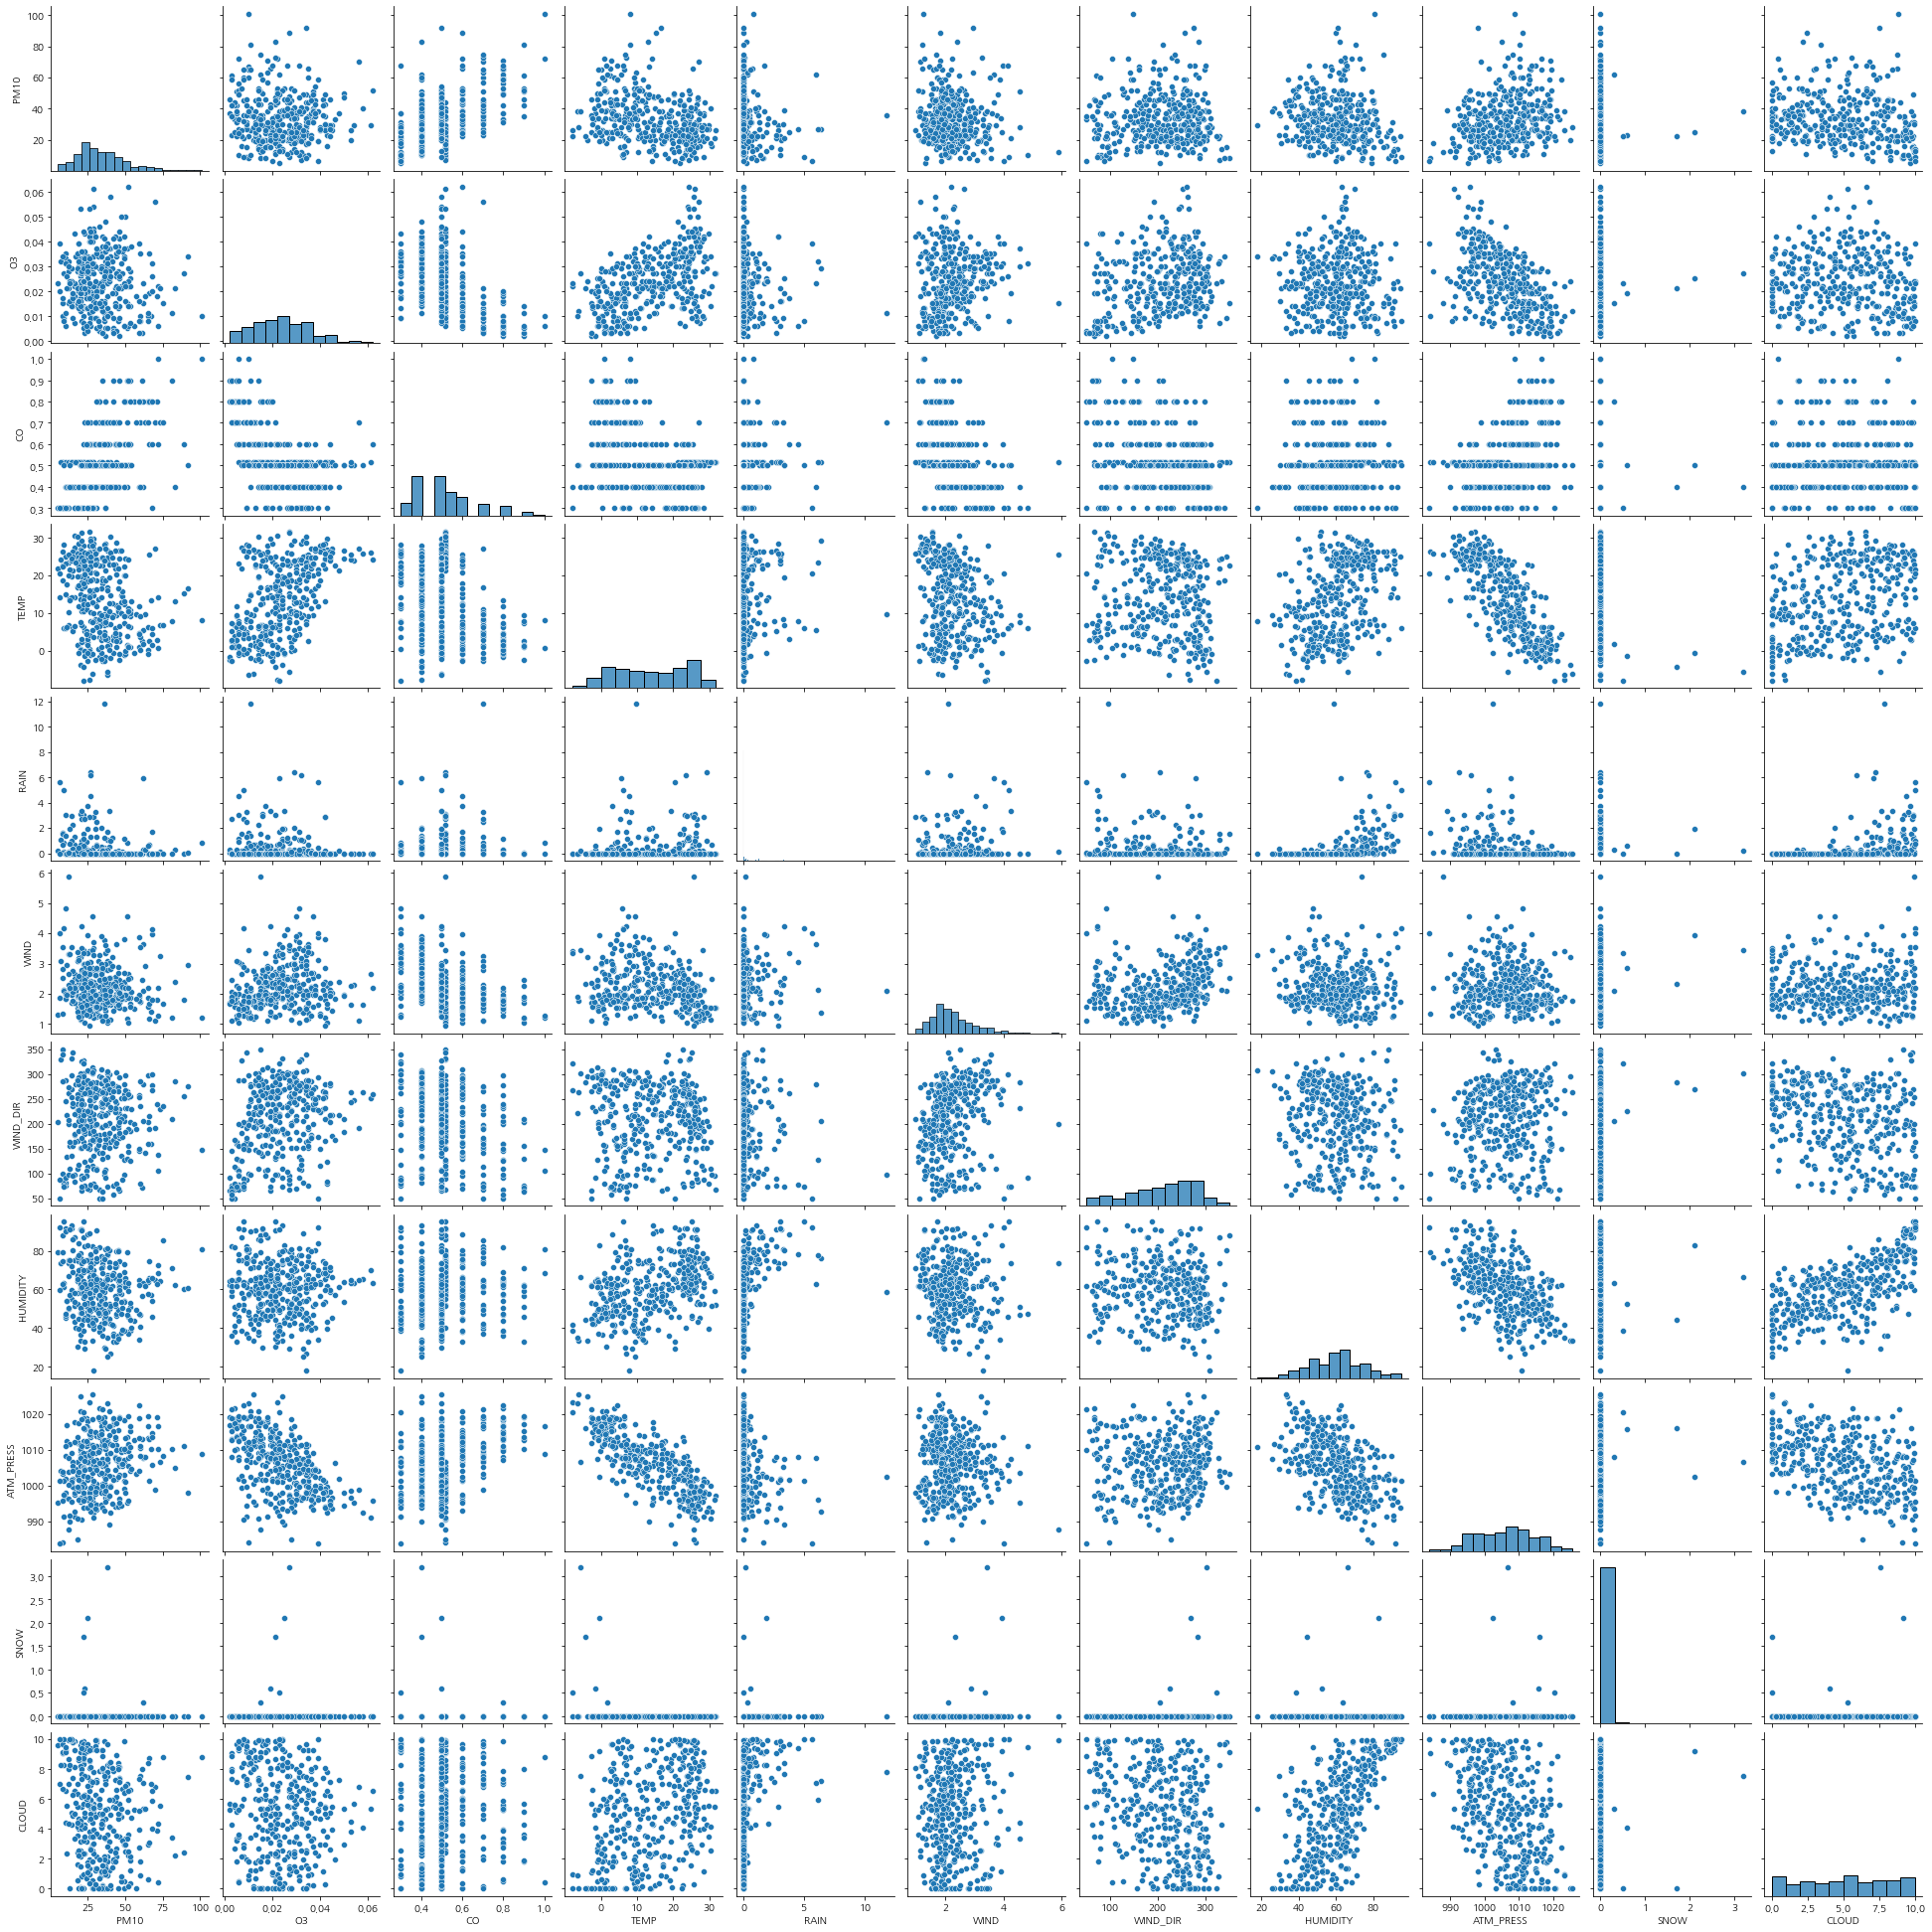

In [20]:
# 상관성을 보기 위한 산점도
sns.pairplot(df_raw)
plt.show()

#### 산점도 그래프 분석 결과
- 설명변수 중 목표변수에 영향을 미치는 인자가 무엇인지 파악하기 위해 산점도를 뽑아 확인 후 다음의 인자로 채택함
    - O3, TEMP, WIND_DIR, HUMIDITY, ATM_PRESS, CLOUD**
- 영향을 미치는 인자들을 구체적으로 파악하기 위해 Heatmap을 통해 특성 추출함

In [21]:
heat_test = df_raw.copy()
heat_test.drop(['MeasDate', 'NEWWIND', 'SNOW_', 'RAIN_'], axis=1, inplace=True)

In [22]:
heat_test.corr().round(3)

,PM10,O3,CO,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
PM10,1.000,-0.052,0.548,-0.310,-0.121,-0.100,0.020,-0.150,0.253,-0.020,-0.172
O3,-0.052,1.000,-0.509,0.516,-0.104,0.165,0.269,-0.038,-0.534,0.004,-0.119
CO,0.548,-0.509,1.000,-0.340,0.037,-0.412,-0.320,0.057,0.385,-0.056,0.037
TEMP,-0.310,0.516,-0.340,1.000,0.077,-0.216,-0.050,0.404,-0.792,-0.185,0.342
RAIN,-0.121,-0.104,0.037,0.077,1.000,0.126,-0.183,0.397,-0.236,0.019,0.358
WIND,-0.100,0.165,-0.412,-0.216,0.126,1.000,0.235,-0.084,-0.054,0.146,0.017
WIND_DIR,0.020,0.269,-0.320,-0.050,-0.183,0.235,1.000,-0.099,0.068,0.108,-0.297
HUMIDITY,-0.150,-0.038,0.057,0.404,0.397,-0.084,-0.099,1.000,-0.510,0.022,0.628
ATM_PRESS,0.253,-0.534,0.385,-0.792,-0.236,-0.054,0.068,-0.510,1.000,0.040,-0.430
SNOW,-0.020,0.004,-0.056,-0.185,0.019,0.146,0.108,0.022,0.040,1.000,0.021


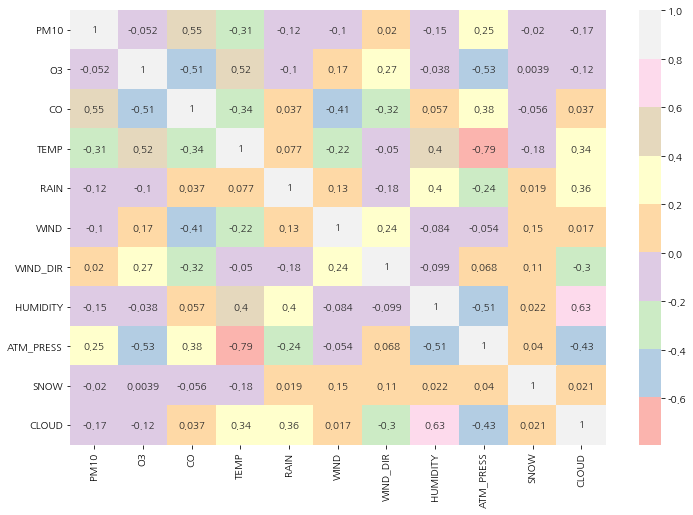

In [23]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(heat_test.corr(), annot=True, cmap='Pastel1')
plt.show()

#### 히트맵 그래프 분석 결과
- 설명변수와 목표변수와의 상관성을 명확히 파악하기 위해 히트맵 사용
    - O3, TEMP, WIND_DIR, HUMIDITY, ATM_PRESS, CLOUD

### <span style='color:red'>1번 가설 검정</span>
    1. 귀무가설 : 미세먼지 농도는 풍향(편서풍)에 따라 미세먼지 발생량이 증가할 것이다.
    2. 대립가설 : 미세먼지 농도는 풍향(편서풍)에 따라 미세먼지 발생량이 감소할 것이다.
    3. 유의수준 : 0.05
    4. 상관분석 수행
    5. 분석 결과 해석

#### ANOVA 분석

In [24]:
reg_model = smf.ols(formula="PM10 ~ O3+CO+TEMP+WIND+WIND_DIR+HUMIDITY+ATM_PRESS+CLOUD+NEWWIND+SNOW_+RAIN_", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     26.72
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           6.80e-45
Time:                        05:23:04   Log-Likelihood:                -1402.4
No. Observations:                 365   AIC:                             2833.
Df Residuals:                     351   BIC:                             2887.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      254.3376    160.540      1.584   

In [25]:
df_final_para = df_raw.copy()
df_final_para.drop(['MeasDate', 'WIND', 'WIND_DIR', 'ATM_PRESS', 'CLOUD'], axis=1, inplace=True)

In [26]:
df_final_para_dummy = pd.get_dummies(df_final_para)

#### <span style='color:red'>검정 결과</span>
- p_value가 0.05 이하라는 것은 회귀계수(목표변수)와 연관성이 있다는 것이므로 유의미한 인자임을 나타냄.
- 따라서, ANOVA 테이블을 참고하여 p-value가 0.05보다 낮은 변수를 추출하면 다음과 같다.
    - TEMP, CO, O3, NEWWIND[T,N], NEWWIND[T.S], NEWWIND[T.W], HUMIDITY
- 그러므로, 후에 모델을 생성할 때, 위의 파라미터를 이용하기로 채택한다.

### <span style='color:red'>2번 가설 검정</span>
    1. 귀무가설 : 비가 오는 날에는 미세먼지 발생량이 감소할 것이다.
    2. 대립가설 : 비가 오지 않는 날에는 미세먼지 발생량이 증가할 것이다.
    3. 유의수준 : 0.05
    4. 상관분석 수행
    5. 분석 결과 해석

#### 정규성, 등분산성 검증

#### 정규성 검정 결과
- 두 평균 전부 p-value의 값이 유의수준인 0.05보다 크므로 정규성을 갖는다고 할 수 있다.

In [27]:
shapiro(df_raw[df_raw['RAIN_'] == 'O']['PM10'])

ShapiroResult(statistic=0.8876467347145081, pvalue=9.800134392889959e-08)

In [28]:
shapiro(df_raw[df_raw['RAIN_'] == 'X']['PM10'])

ShapiroResult(statistic=0.9625291228294373, pvalue=3.7925456126686186e-06)

#### 등분산성 검정 결과
- p-value의 값이 유의수준인 0.05보다 크므로 등분산성을 갖는다고 할 수 있다.

In [29]:
stats.levene(df_raw[df_raw['RAIN_'] == 'O']['PM10'], df_raw[df_raw['RAIN_'] == 'X']['PM10'])

LeveneResult(statistic=1.1403029696864806, pvalue=0.28629795077341624)

#### 2 Sample t test

In [30]:
t_result = stats.ttest_ind(df_raw[df_raw['RAIN_'] == 'O']['PM10'], df_raw[df_raw['RAIN_'] == 'X']['PM10'])
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("Sample t-test")
print("t 통계량 : {0}".format(t))
print("p-value : {0}".format(p))

Sample t-test
t 통계량 : -2.904
p-value : 0.004


#### <span style='color:red'>검정 결과</span>
- p_value가 0.05 이하 이므로 귀무가설에 대해 기각력이 존재한다.
- 이로써 "비가 오지 않는 날에는 미세먼지 발생량은 증가할 것이다"인 대립가설을 채택할 수 있다.
- 또한, t 통계량이 음수인 것을 통해 비가 온날의 미세먼지 농도는 오지 않은 날보다 더 높다고 할 수 있다.

### <span style='color:red'>3번 가설 검정</span>
    1. 귀무가설 : 미세먼지 농도는 눈이 오는날에는 미세먼지 발생량이 증가할 것이다.
    2. 대립가설 : 미세먼지 농도는 눈이 오지 않는 날에는 미세먼지 발생량이 감소할 것이다.
    3. 유의수준 : 0.05
    4. 상관분석 수행
    5. 분석 결과 해석

#### 정규성, 등분산성 검증

#### 정규성 검정 결과
- 두 평균 전부 p-value의 값이 유의수준인 0.05보다 크므로 정규성을 갖는다고 할 수 있다.

In [31]:
shapiro(df_raw[df_raw['SNOW_'] == 'O']['PM10'])

ShapiroResult(statistic=0.7293481826782227, pvalue=0.01241486705839634)

In [32]:
shapiro(df_raw[df_raw['SNOW_'] == 'X']['PM10'])

ShapiroResult(statistic=0.9501688480377197, pvalue=1.1793275245253199e-09)

#### 등분산성 검정 결과

In [33]:
stats.levene(df_raw[df_raw['SNOW_'] == 'O']['PM10'], df_raw[df_raw['SNOW_'] == 'X']['PM10'])

LeveneResult(statistic=0.3586902243049279, pvalue=0.5496081130653981)

#### 2 Sample t test

In [34]:
t_result = stats.ttest_ind(df_raw[df_raw['SNOW_'] == 'O']['PM10'], df_raw[df_raw['SNOW_'] == 'X']['PM10'])
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("Sample t-test")
print("t 통계량 : {0}".format(t))
print("p-value : {0}".format(p))

Sample t-test
t 통계량 : -0.22
p-value : 0.826


#### <span style='color:red'>검정 결과</span>
- p-value의 값이 0.05 보다 크므로 귀무가설을 채택한다고 할 수 있다.

## 모델 학습

### Linear Regression

In [35]:
# 선형 회귀 분석 
reg_model = smf.ols(formula = "PM10 ~ O3+CO+TEMP+HUMIDITY+NEWWIND_E+NEWWIND_N+NEWWIND_S+NEWWIND_W+SNOW__O+SNOW__X+RAIN__O+RAIN__X", data = df_final_para_dummy)
reg_result = reg_model.fit()

print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     37.34
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           2.44e-46
Time:                        05:23:04   Log-Likelihood:                -1406.4
No. Observations:                 365   AIC:                             2833.
Df Residuals:                     355   BIC:                             2872.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8598      2.281     -2.569      0.0

#### ANOVA 분석 결과
- p_value가 0.05 이하라는 것은 회귀계수(목표변수)와 연관성이 있다는 것이므로 유의미한 인자임을 나타냄.
- 따라서, ANOVA 테이블을 참고하여 p-value가 0.05보다 낮은 변수를 추출하면 다음과 같다.
    - O3, O3, TEMP, NEWWIND_E, NEWWIND_N, NEWWIND_W, RAIN__X
- 그러므로, 후에 모델을 생성할 때, 위의 파라미터를 이용하기로 채택한다.

### Decision Tree

In [36]:
df_final_para_dummy.drop(["PM10"], axis=1, inplace=True)

In [37]:
# train과 test 데이터를 7:3 비율로 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_final_para_dummy, df_raw_y, test_size = 0.4, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (219, 14)
train data Y size : (219,)
test data X size : (146, 14)
test data Y size : (146,)


In [38]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# score는 각 Train과 Test의 설명력을 의미한다.
print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : 0.253


#### <span style="color:green">잎사귀 노드 최소 자료 수 변경 결과</span>
- Leaf가 4일 때, TrainScore와 TestScore의 차이가 가장 적으며, 두 수 다 큰 값을 갖는다.

In [39]:
# 모델의 파라미터 조정하기 - 1. 잎사귀 노드의 최소 자료 수 변경
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 30)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.253
1,2,0.882,0.213
2,3,0.795,0.420
3,4,0.747,0.444
4,5,0.713,0.428
5,6,0.660,0.380
6,7,0.613,0.388
7,8,0.593,0.392
8,9,0.581,0.378
9,10,0.557,0.284


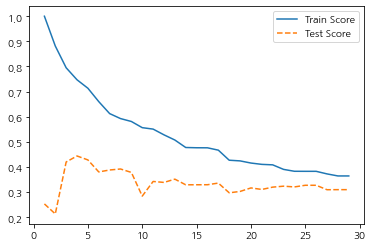

In [40]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()

#### <span style="color:green">분리 노드 최소 자료 수 변경 결과</span>
- Split가 11일 때, TrainScore와 TestScore의 차이가 가장 적으며, 두 수 다 큰 값을 갖는다.

In [41]:
# 모델의 파라미터 조정하기 - 2. 분리 노드의 최소 자료 수 변경
train_score = []
test_score = []

para_split = [n_split for n_split in range(1, 25)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=4, min_impurity_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,1,0.747,0.444
1,2,0.747,0.444
2,3,0.747,0.444
3,4,0.747,0.444
4,5,0.747,0.444
5,6,0.747,0.444
6,7,0.747,0.444
7,8,0.747,0.444
8,9,0.747,0.444
9,10,0.747,0.444


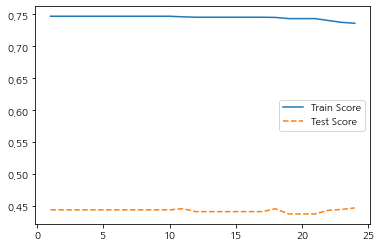

In [42]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()

#### <span style="color:green">최대 깊이 변경 결과</span>
- Depth가 5일 때, TrainScore와 TestScore의 차이가 가장 적으며, 두 수 다 큰 값을 갖는다.

In [43]:
train_score = []
test_score = []

para_depth = [depth for depth in range(2, 10)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=2, min_samples_split=11, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,2,0.316,0.249
1,3,0.418,0.336
2,4,0.553,0.379
3,5,0.633,0.441
4,6,0.685,0.343
5,7,0.704,0.439
6,8,0.710,0.445
7,9,0.715,0.438


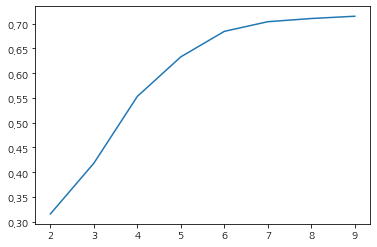

In [44]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")

#### <span style="color:red">Hyper Parameter 변경 결과</span>
- Leaf : 4
- Split : 11
- Depth : 5

In [45]:
tree_final = DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=11, max_depth=5, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=11,
                      random_state=1234)

In [46]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,CO,0.506
0,O3,0.294
4,HUMIDITY,0.105
2,TEMP,0.095
3,RAIN,0.000
5,SNOW,0.000
6,NEWWIND_E,0.000
7,NEWWIND_N,0.000
8,NEWWIND_S,0.000
9,NEWWIND_W,0.000


In [47]:
tree_uncustomized = DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=11, max_depth=5, random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.624
Score on test set : 0.451


In [48]:
# 최종 모델 선정 및 학습
model_final = DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=11, max_depth=5, random_state=1234)
model_final.fit(df_train_x, df_train_y)
y_pred = model_final.predict(df_test_x)

df_result = pd.DataFrame()
df_result["실제값"] = df_test_y
df_result["예측값"] = y_pred
df_result

,실제값,예측값
156,25.0,28.176471
310,28.0,32.548387
97,11.0,14.166667
134,37.0,34.000000
7,10.0,14.166667
...,...,...
124,67.0,55.000000
5,29.0,32.548387
223,34.0,28.176471
63,25.0,25.555556


In [49]:
# 예측값과 mse
DecisionTreeMEAN = df_result["예측값"].mean()
DecisionTreeMSE = statsmodels.tools.eval_measures.mse(df_result["실제값"], df_result["예측값"], axis=0)

print('*** DecisionTree mean, mse ***','\n')
print(f"     {DecisionTreeMEAN}\n     {DecisionTreeMSE}")

*** DecisionTree mean, mse *** 

     33.53710152892451
     155.44774109902858


Text(0, 0.5, '변수')

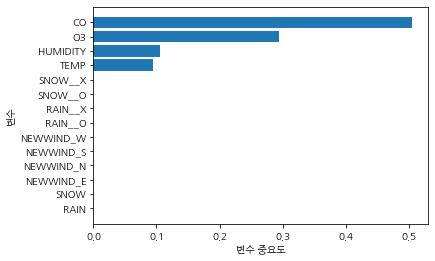

In [50]:
df_importance.sort_values("Importance", ascending=True,inplace=True)
coordinates = range(len(df_importance))

plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

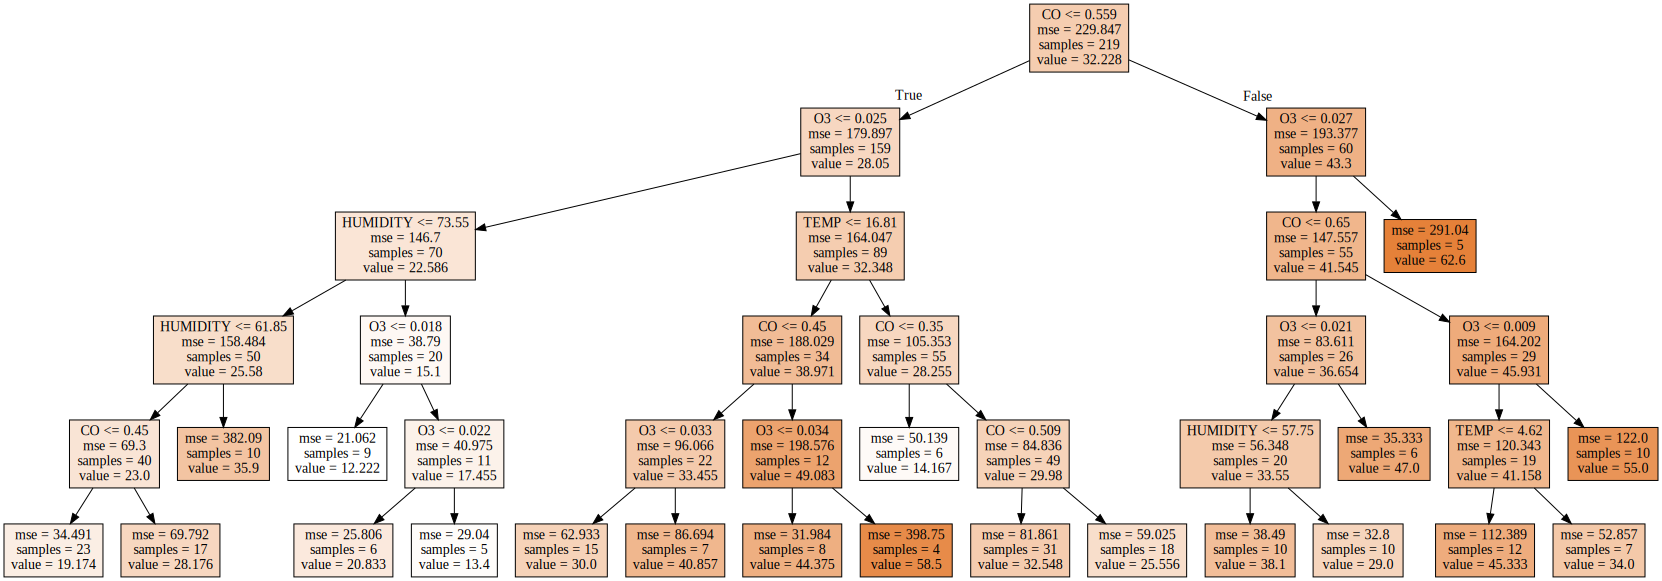

In [51]:
# 최종 의사결정 트리 시각화
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=11, max_depth=5, random_state=1234)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### <span style="color:red">Decision Tree 결론</span>
- 앞서 확인한 Leaf = 4, Split = 11, Depth = 5로 최종 모델을 학습시킨 결과 다음과 같은 score를 얻을 수 있었다.
    - TRAINING SCORE : 62.4%, TEST SCORE : 45.1%
- 'PM10' 변수에 대한 예측값은 약 33.54로 예상할 수 있다.
- 또한 변수 중요도를 살펴본 결과 CO, O3, HUMIDITY, TEMP의 항목에 따라 결과값이 영향을 받는다는 것을 알 수 있었다.

### Random Forest

In [52]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.917
Score on test set : 0.529


In [53]:
train_score = []
test_score = []

para_n_tree = [n_tree for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,1,0.580,0.260
1,2,0.712,0.472
2,3,0.758,0.451
3,4,0.801,0.446
4,5,0.820,0.453
5,6,0.829,0.485
6,7,0.849,0.468
7,8,0.866,0.475
8,9,0.873,0.482
9,10,0.880,0.480


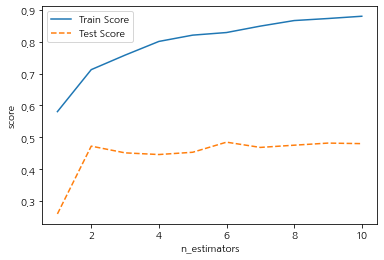

In [54]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

#### <span style="color:green">트리 수 변경 결과</span>
- Estimators가 5일 때, TrainScore와 TestScore의 차이가 가장 적으며, 두 수 다 큰 값을 갖는다.

#### <span style="color:green">잎사귀 노드 최소 자료 수 변경 결과</span>
- Leaf가 2일 때, TrainScore와 TestScore의 차이가 가장 적으며, 두 수 다 큰 값을 갖는다.

In [55]:
train_score = []
test_score = []

para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators=5, random_state = 1234, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.820,0.453
1,2,0.771,0.476
2,3,0.724,0.517
3,4,0.640,0.459
4,5,0.608,0.446
5,6,0.581,0.442
6,7,0.568,0.441
7,8,0.554,0.444
8,9,0.545,0.434
9,10,0.535,0.434


In [56]:
MinSamplesLeaf=2

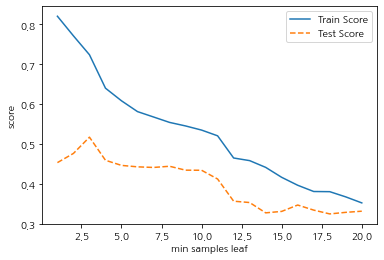

In [57]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

#### <span style="color:green">분리 노드 최소 자료 수 변경 결과</span>
- Split가 5일 때, TrainScore와 TestScore의 차이가 가장 적으며, 두 수 다 큰 값을 갖는다.

In [58]:
train_score = []
test_score = []

para_split = [n_split for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators=5, random_state = 1234, min_samples_leaf=2, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesSplit"] = para_split
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.771,0.476
1,3,0.771,0.476
2,4,0.771,0.476
3,5,0.762,0.490
4,6,0.744,0.489
5,7,0.738,0.476
6,8,0.716,0.480
7,9,0.686,0.477
8,10,0.677,0.479
9,11,0.671,0.457


MinSamplesSplit	= 5

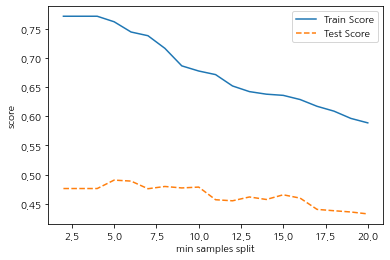

In [59]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

#### <span style="color:green">최대 깊이 변경 결과</span>
- Depth가 10일 때, TrainScore와 TestScore의 차이가 가장 적으며, 두 수 다 큰 값을 갖는다.

In [60]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 20)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators=5, random_state = 1234, min_samples_leaf=2, min_samples_split=5, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["Depth"] = para_depth
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,Depth,TrainScore,TestScore
0,1,0.199,0.307
1,2,0.341,0.309
2,3,0.453,0.377
3,4,0.547,0.421
4,5,0.635,0.482
5,6,0.678,0.488
6,7,0.721,0.474
7,8,0.740,0.491
8,9,0.743,0.481
9,10,0.747,0.483


max_depth = 10

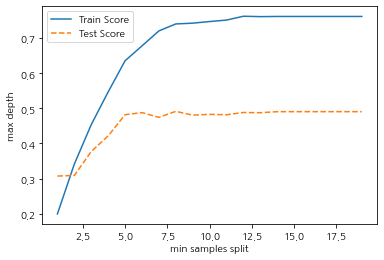

In [61]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("max depth")
plt.xlabel("min samples split")
plt.legend()

#### <span style="color:red">Hyper Parameter 변경 결과</span>
- Estimators : 5
- Leaf : 2
- Split : 5
- Depth : 10

In [62]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=5, min_samples_leaf=2, min_impurity_split=5, max_depth=10)

rf_final.fit(df_train_x, df_train_y)
print("Score on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set : 0.758
Score on test set : 0.492


In [63]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,CO,0.380
0,O3,0.227
2,TEMP,0.170
4,HUMIDITY,0.144
3,RAIN,0.040
6,NEWWIND_E,0.023
9,NEWWIND_W,0.009
8,NEWWIND_S,0.006
10,RAIN__O,0.001
5,SNOW,0.000


Text(0, 0.5, '변수')

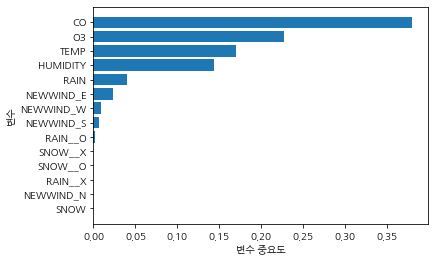

In [64]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

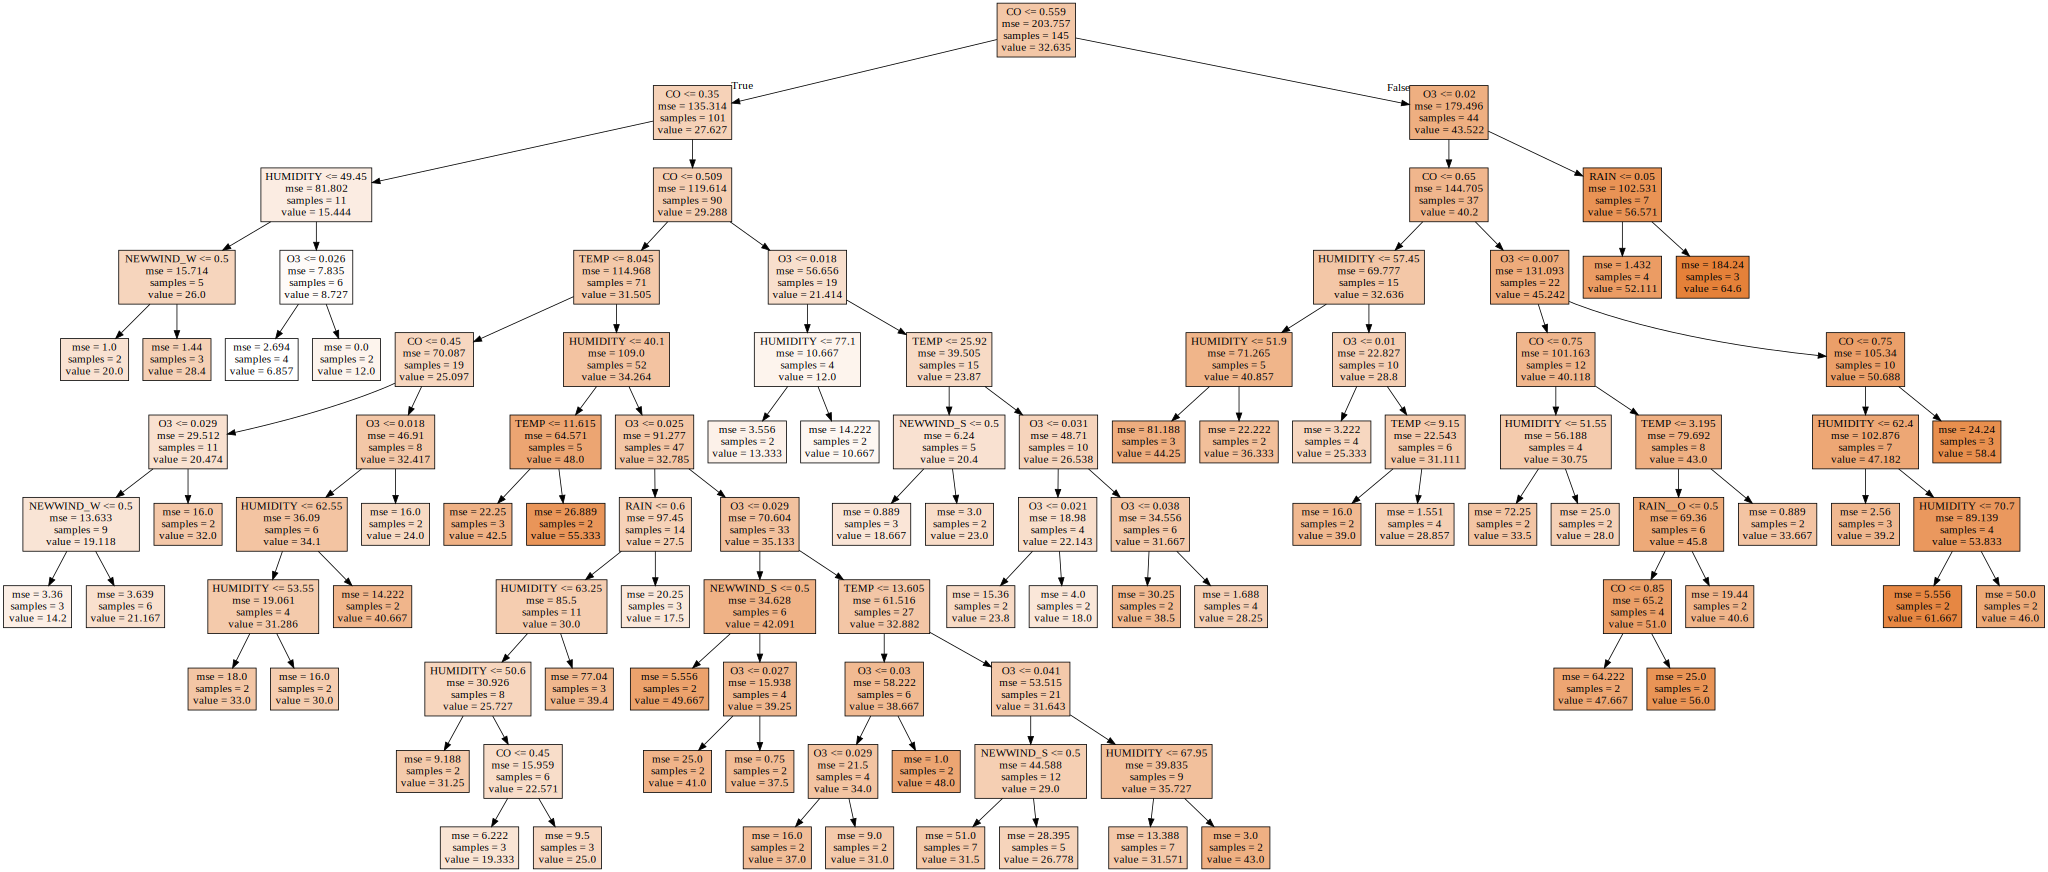

In [65]:
# 최종 의사결정 트리 시각화
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[0], out_file="rf_final_0.dot", feature_names=v_feature_name, impurity=True, filled=True)
with open("rf_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### <span style="color:red">Random Forest 결론</span>
- 앞서 확인한 Estimators = 5, Leaf = 2, Split = 5, Depth = 10로 최종 모델을 학습시킨 결과 다음과 같은 score를 얻을 수 있었다.
    - TRAINING SCORE : 75.8%, TEST SCORE : 49.2%
- 'PM10' 변수에 대한 예측값은 약 33.54로 예상할 수 있다.
- 또한 변수 중요도를 살펴본 결과 CO, O3, HUMIDITY, TEMP의 항목에 따라 결과값이 영향을 받는다는 것을 알 수 있었다.

### Gradient Boosting

In [66]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.904
Score on test set : 0.527


#### <span style="color:green">트리 수 변경 결과</span>
- Estimators가 196일 때, TrainScore와 TestScore의 차이가 가장 적으며, 두 수 다 큰 값을 갖는다.

In [67]:
# 그래디언트 부스팅 모델 생성 - 1. 생성되는 트리(모델) 개수 변경
train_score = []
test_score = []

para_n_tree = [n_tree for n_tree in range(20, 200)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,20,0.624,0.436
1,21,0.637,0.437
2,22,0.645,0.444
3,23,0.656,0.446
4,24,0.665,0.460
...,...,...,...
175,195,0.962,0.533
176,196,0.962,0.532
177,197,0.962,0.532
178,198,0.962,0.532


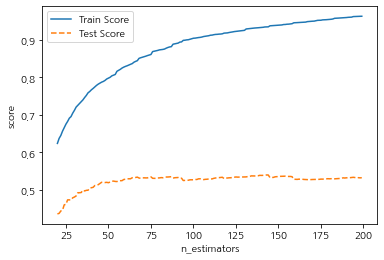

In [68]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

#### <span style="color:green">잎사귀 노드 최소 자료 수 변경 결과</span>
- Leaf가 2일 때, TrainScore와 TestScore의 차이가 가장 적으며, 두 수 다 큰 값을 갖는다.

In [69]:
# 그래디언트 부스팅 모델 생성 - 2. 잎사귀 노드 최소 자료 수 변경
train_score = []
test_score = []

para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators=196, random_state = 1234, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.962,0.532
1,2,0.954,0.541
2,3,0.949,0.560
3,4,0.937,0.559
4,5,0.928,0.559
5,6,0.911,0.531
6,7,0.914,0.532
7,8,0.911,0.521
8,9,0.907,0.507
9,10,0.888,0.523


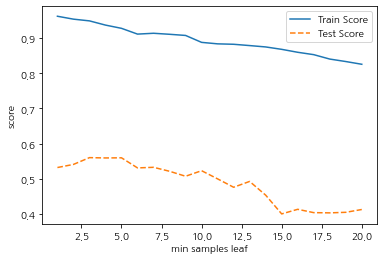

In [70]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

#### <span style="color:green">분리 노드 최소 자료 수 변경 결과</span>
- Split가 18일 때, TrainScore와 TestScore의 차이가 가장 적으며, 두 수 다 큰 값을 갖는다.

In [71]:
# 그래디언트 부스팅 모델 생성 - 3. 분리 노드 최소 자료 수 변경
train_score = []
test_score = []

para_split = [n_split * 2 for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(n_estimators=196, random_state = 1234, min_samples_leaf=2, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesSplit"] = para_split
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.954,0.541
1,4,0.954,0.541
2,6,0.947,0.538
3,8,0.949,0.541
4,10,0.944,0.535
5,12,0.942,0.542
6,14,0.941,0.533
7,16,0.938,0.539
8,18,0.932,0.538
9,20,0.927,0.517


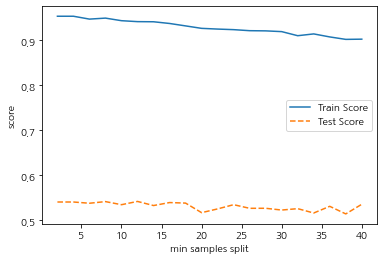

In [72]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

#### <span style="color:green">최대 깊이 변경 결과</span>
- Depth가 7일 때, TrainScore와 TestScore의 차이가 가장 적으며, 두 수 다 큰 값을 갖는다.

In [73]:
#그래디언트 부스팅 모델 생성 - 4. 최대 깊이 변경
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = RandomForestRegressor(n_estimators=196, random_state = 1234, min_samples_leaf=2, min_samples_split=18, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["Depth"] = para_depth
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,Depth,TrainScore,TestScore
0,1,0.220,0.303
1,2,0.385,0.338
2,3,0.499,0.416
3,4,0.592,0.450
4,5,0.647,0.470
5,6,0.668,0.476
6,7,0.675,0.478
7,8,0.677,0.478
8,9,0.677,0.479
9,10,0.677,0.479


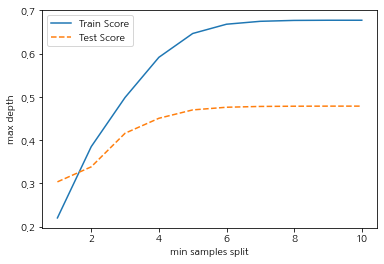

In [74]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("max depth")
plt.xlabel("min samples split")
plt.legend()

#### <span style="color:green">학습률 변경 결과</span>
- Learning Rate가 0.1일 때, TrainScore와 TestScore의 차이가 가장 적으며, 두 수 다 큰 값을 갖는다.

In [75]:
#그래디언트 부스팅 모델 생성 - 5. 학습률 변경
train_score = []
test_score = []

para_lr= [lr for lr in range(1, 20)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(n_estimators=196, random_state = 1234, min_samples_leaf=2,\
                                   min_samples_split=18, max_depth=7, learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["LearningRate"] = para_lr
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,LearningRate,TrainScore,TestScore
0,1,1.000000e+00,3.610000e-01
1,2,0.000000e+00,-3.068500e+01
2,3,-6.826333e+117,-6.565848e+117
3,4,-7.144691e+186,-6.636795e+186
4,5,-6.705024e+235,-6.243000e+235
5,6,-6.502027e+273,-6.062369e+273
6,7,-inf,-inf
7,8,-inf,-inf
8,9,-inf,-inf
9,10,-inf,-inf


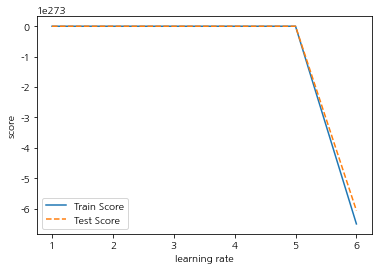

In [76]:
plt.plot(para_lr, train_score, linestyle="-", label="Train Score")
plt.plot(para_lr, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("learning rate")
plt.legend()

In [77]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=196, min_samples_leaf=2,\
                                     min_impurity_split=18, max_depth=7, learning_rate=0.1)

gb_final.fit(df_train_x, df_train_y)
print("Score on training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set : 0.922
Score on test set : 0.516


In [78]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,CO,0.336
0,O3,0.238
2,TEMP,0.171
4,HUMIDITY,0.145
3,RAIN,0.037
6,NEWWIND_E,0.036
9,NEWWIND_W,0.024
11,RAIN__X,0.005
10,RAIN__O,0.004
8,NEWWIND_S,0.004


In [79]:
# 최종 모델 선정 및 학습
model_final = GradientBoostingRegressor(random_state=1234, n_estimators=196, min_samples_leaf=2,\
                                     min_impurity_split=18, max_depth=7, learning_rate=0.1)
model_final.fit(df_train_x, df_train_y)
y_pred = model_final.predict(df_test_x)

df_result = pd.DataFrame()
df_result["실제값"] = df_test_y
df_result["예측값"] = y_pred
df_result

,실제값,예측값
156,25.0,30.973743
310,28.0,27.550693
97,11.0,13.528060
134,37.0,45.751890
7,10.0,17.758022
...,...,...
124,67.0,49.217125
5,29.0,32.046927
223,34.0,27.476385
63,25.0,20.238117


In [80]:
# 예측값과 mse
GradientBoostingMEAN = df_result["예측값"].mean()
GradientBoostingMSE = statsmodels.tools.eval_measures.mse(df_result["실제값"], df_result["예측값"], axis=0)

print('*** GradientBoosting mean, mse ***','\n')
print(f"     {GradientBoostingMEAN}\n     {GradientBoostingMSE}")

*** GradientBoosting mean, mse *** 

     33.51656305707939
     137.04060665742307


Text(0, 0.5, '변수')

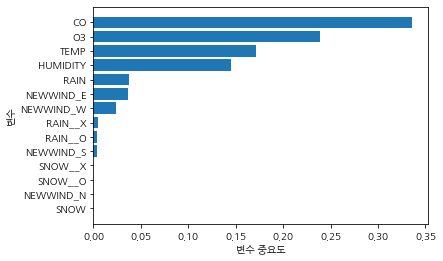

In [81]:
df_importance.sort_values("Importance", ascending=True,inplace=True)
coordinates = range(len(df_importance))

plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

#### <span style="color:red">Gradient Boosting 결론</span>
- 앞서 확인한 Estimators = 196, Leaf = 2, Split = 18, Depth = 10로 최종 모델을 학습시킨 결과 다음과 같은 score를 얻을 수 있었다.
    - TRAINING SCORE : 92.2%, TEST SCORE : 51.6%
- 'PM10' 변수에 대한 예측값은 약 33.52로 예상할 수 있다.
- 또한 변수 중요도를 살펴본 결과 CO, O3, TEMP, HUMIDITY, RAIN, NEWWIND_E, NEWWIND_W, RAIN__X, PAIN__O의 항목에 따라 결과값이 영향을 받는다는 것을 알 수 있었다.

## 최종 모델 도출
- Decision Tree : 45.1%
- Random Forest : 49.2%
- Gradient Boosting : 51.6%

=> Gradient Boosting 기법을 통해 학습시킨 모델의 Test Accuracy가 가장 높았다.  
=> 따라서 처음에 정의했던 미세먼지의 발생량을 예측하기에 적합한 모델은 "Gradient Boosting" 이다.

Text(0, 0.5, '변수')

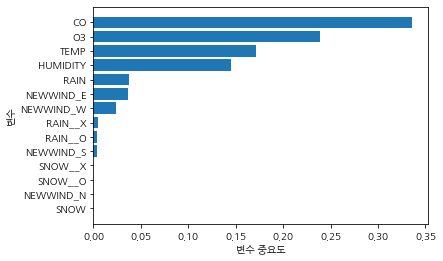

In [82]:
# 변수 별 중요도
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

## <span style='color:blue'>결과 도출</span>
=> Gradient Boosting 기법을 통해 학습시킨 모델의 Test Accuracy가 가장 높았다.  
=> 따라서 처음에 정의했던 미세먼지의 발생량을 예측하기에 적합한 모델은 "Gradient Boosting" 이다.
- Gradient Boosting 기법을 통해 변수의 중요도를 산출한 결과, 미세먼지의 발생량에 영향을 주는 인자는 CO, O3, TEMP, HUMIDITY 순이다.